### Probelm statement

Implementtaion of SVM

In [76]:
#IMPORT all the libararies

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [77]:
# load the data
data = pd.read_csv('loan_approved.csv')

In [78]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Domain Analysis

Should be written

explain about all the features

Expllain about target too

Infomation should be there mapping the influence of input attribute to target

### Basic checks

In [81]:
data.shape

(614, 13)

In [82]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [83]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [84]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status (Approved)'],
      dtype='object')

In [85]:
#rename the target column
data.rename(columns ={'Loan_Status (Approved)':'Loan_Status'},inplace =True)

In [86]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [87]:
#num_col
num_col = data.select_dtypes(include=['int64','float64'])
num_col.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [88]:
cat_col = data.select_dtypes(include=['object'])
cat_col.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [89]:
# when ever we have categorical data, analsye those column
# unique, value counts 

for i in cat_col.drop('Loan_ID',axis=1):
    print(i,data[i].unique())
    print(data[i].value_counts())
    print('-------------------------')

Gender ['Male' 'Female' nan]
Gender
Male      489
Female    112
Name: count, dtype: int64
-------------------------
Married ['No' 'Yes' nan]
Married
Yes    398
No     213
Name: count, dtype: int64
-------------------------
Dependents ['0' '1' '2' '3+' nan]
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
-------------------------
Education ['Graduate' 'Not Graduate']
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
-------------------------
Self_Employed ['No' 'Yes' nan]
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
-------------------------
Property_Area ['Urban' 'Rural' 'Semiurban']
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
-------------------------
Loan_Status ['Y' 'N']
Loan_Status
Y    422
N    192
Name: count, dtype: int64
-------------------------


1. By analysing the target column we get to know whether a dataset is balanced or notr 

2. Check for balancing only for classification data

3. both the classes in the target should have equal records

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [92]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [93]:
data.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


### EDA

1 Univariate analysis

sweetviz -

      - automated graphing library

     - perform univariate analysis
     
     - all the attributes and give the html file as a report

In [96]:
!pip install sweetviz

  Using cached sweetviz-2.3.1-py3-none-any.whl.metadata (24 kB)
  Using cached importlib_resources-6.4.5-py3-none-any.whl.metadata (4.0 kB)
Using cached sweetviz-2.3.1-py3-none-any.whl (15.1 MB)
Using cached importlib_resources-6.4.5-py3-none-any.whl (36 kB)


In [97]:
#library for univariate analsysis

import sweetviz as sv #importing the sweetviz library

report = sv.analyze(data) # here we are initializing the graph flow

report.show_html('Myreport_22Jan.html') # the output is in the form of a  html file

                                             |                                             | [  0%]   00:00 ->…

Report Myreport_22Jan.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [98]:
##Bivariate analsysis

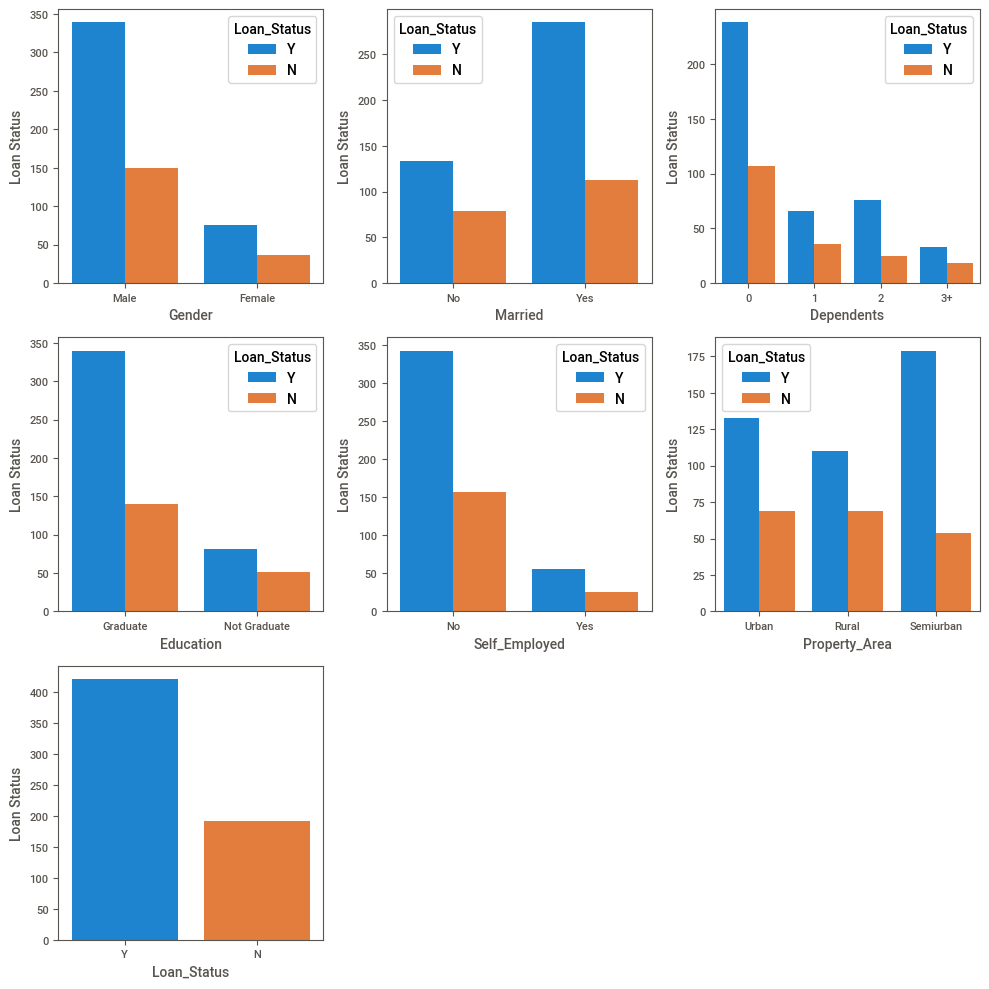

In [99]:
# we will analyse the categoorica column vs target

plt.figure(figsize=(10,10))
plot = 1
for i in cat_col.drop('Loan_ID',axis=1):
    if plot <= 9:
        ax = plt.subplot(3,3,plot)
        sns.countplot(x=data[i],hue=data['Loan_Status'])
        plt.xlabel(i,fontsize=10)
        plt.ylabel('Loan Status',fontsize=10)
    plot+=1
plt.tight_layout()

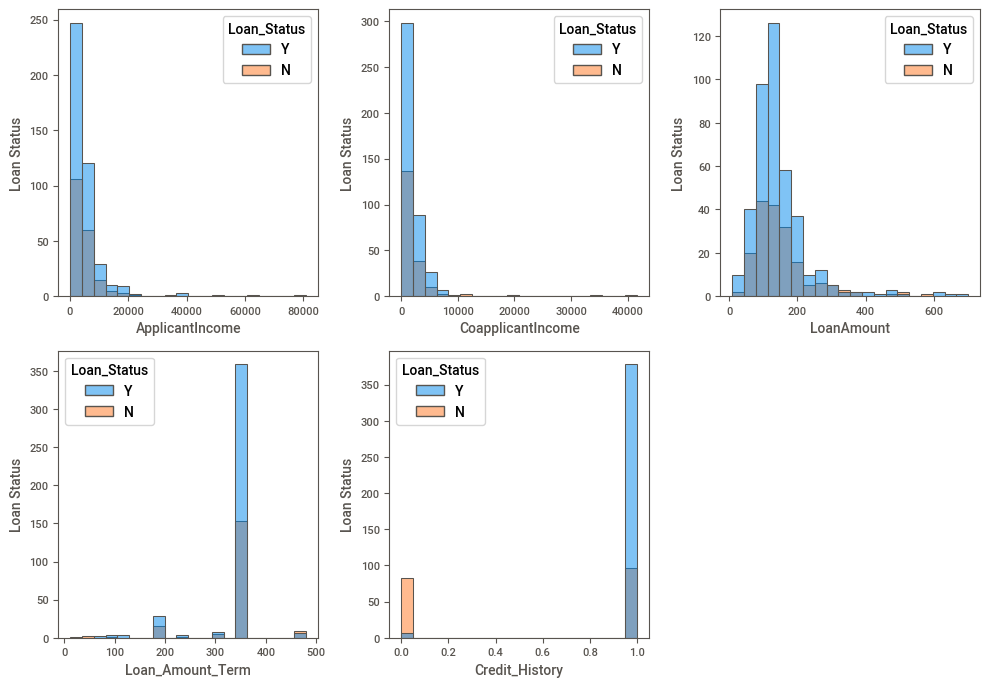

In [100]:
# numerical vs target
plt.figure(figsize=(10,10))
plot = 1
for i in num_col:
    if plot <= 16:
        ax = plt.subplot(3,3,plot)
        sns.histplot(x=data[i], hue = data['Loan_Status'],bins=20)
        plt.xlabel(i,fontsize=10)
        plt.ylabel('Loan Status',fontsize=10)
    plot+=1
plt.tight_layout()

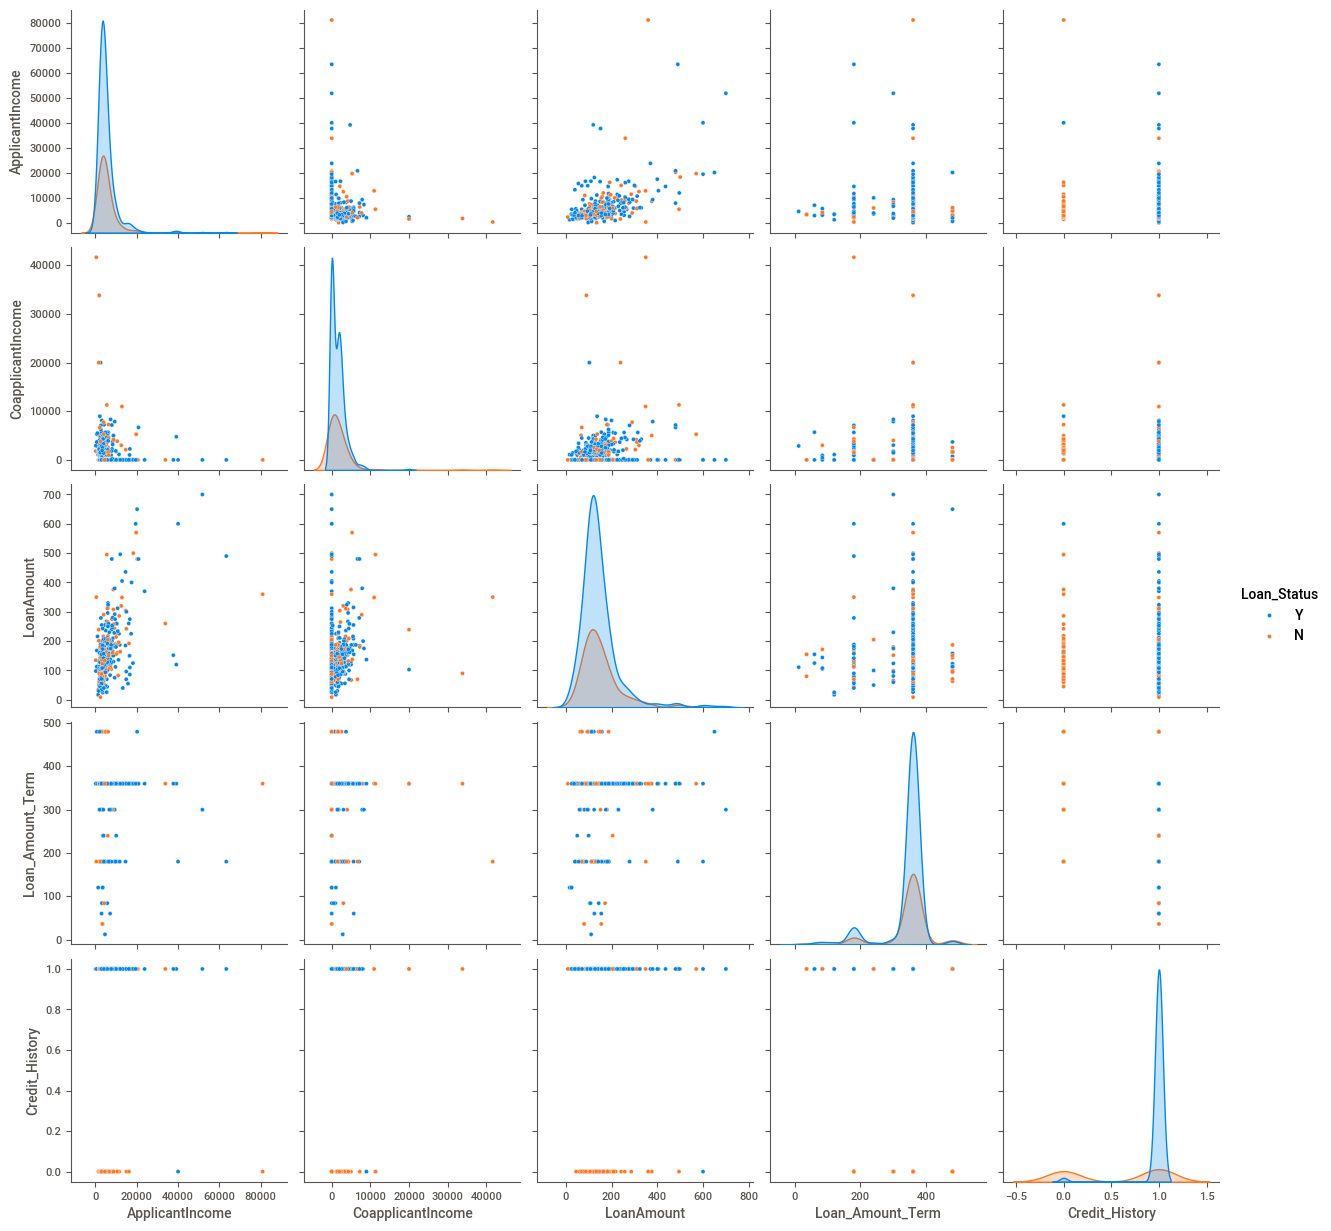

In [101]:
### Multivariate
sns.pairplot(data,hue='Loan_Status')

### Preprossing the data

In [103]:
# null values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [104]:
# % of null values > 80% drop the column
# % of null values < 80% then handle it
(data.isnull().sum()/len(data))* 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [105]:
data['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [106]:
# Gender
data.loc[data['Gender'].isnull() == True,'Gender'] ='Male'

In [107]:
data['Dependents'].mode()

0    0
Name: Dependents, dtype: object

In [108]:
data.loc[data['Dependents'].isnull()==True,'Dependents'] = '3+'

In [109]:
data['Married'].mode()

0    Yes
Name: Married, dtype: object

In [110]:
data.loc[data['Married'].isnull()==True,'Married'] = 'Yes'

In [111]:
data['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [112]:
data.loc[data['Self_Employed'].isnull()==True,'Self_Employed'] = 'No'

In [113]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: ylabel='Density'>

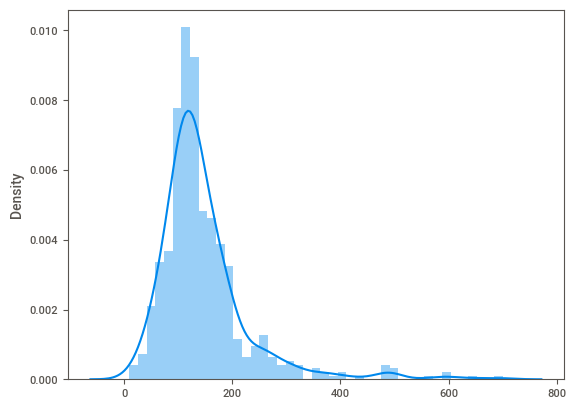

In [114]:
sns.distplot(x=data['LoanAmount'])

In [115]:
data.loc[data['LoanAmount'].isnull()==True,'LoanAmount']= data['LoanAmount'].median()

<Axes: ylabel='Density'>

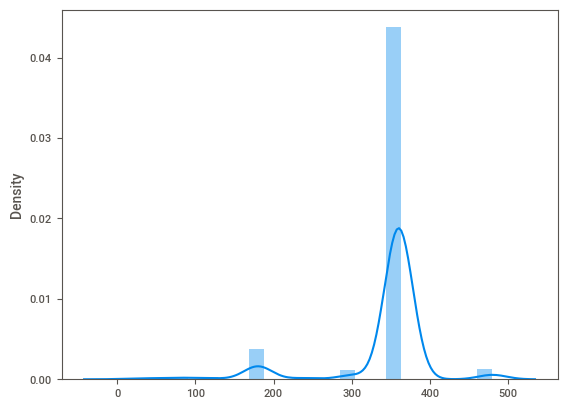

In [116]:
sns.distplot(x=data['Loan_Amount_Term'])

In [117]:
data.loc[data['Loan_Amount_Term'].isnull()==True,'Loan_Amount_Term']= data['Loan_Amount_Term'].median()

<Axes: ylabel='Density'>

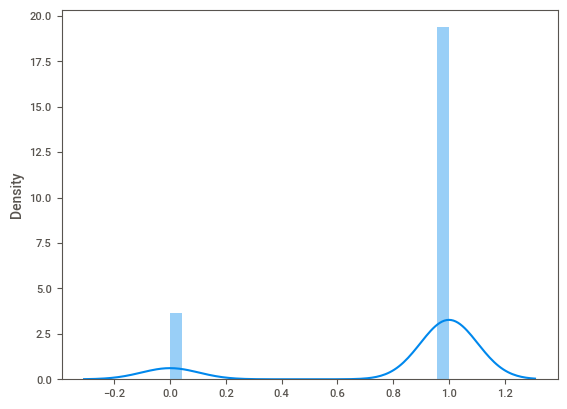

In [118]:
sns.distplot(x=data['Credit_History'])

In [119]:
data['Credit_History'].mode()

0    1.0
Name: Credit_History, dtype: float64

In [120]:
data.loc[data['Credit_History'].isnull()==True,'Credit_History']= 1.0

In [121]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [122]:
# duplicates
data.duplicated().sum()

0

In [123]:
# skipping outlier analysis because SVM ignores outliers

In [124]:
# scaling
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [125]:
# Scaling
#MinMax Scaler
#performed on continuous data

In [126]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

data[['ApplicantIncome','CoapplicantIncome','LoanAmount']]= sc.fit_transform(data[['ApplicantIncome','CoapplicantIncome','LoanAmount']])

In [127]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.070489,0.000000,0.172214,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,0.054830,0.036192,0.172214,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,0.035250,0.000000,0.082489,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,0.030093,0.056592,0.160637,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0.072356,0.000000,0.191027,360.0,1.0,Urban,Y


In [128]:
# ENCODING
# LABEL ENCODING

from sklearn.preprocessing import LabelEncoder

lc = LabelEncoder()

In [129]:
data1 = data.copy()

In [130]:
data1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.070489,0.000000,0.172214,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,0.054830,0.036192,0.172214,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,0.035250,0.000000,0.082489,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,0.030093,0.056592,0.160637,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0.072356,0.000000,0.191027,360.0,1.0,Urban,Y


In [131]:
cat_col.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [132]:
data1['Gender'] = lc.fit_transform(data1['Gender'])

In [133]:
data1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,0,Graduate,No,0.070489,0.000000,0.172214,360.0,1.0,Urban,Y
1,LP001003,1,Yes,1,Graduate,No,0.054830,0.036192,0.172214,360.0,1.0,Rural,N
2,LP001005,1,Yes,0,Graduate,Yes,0.035250,0.000000,0.082489,360.0,1.0,Urban,Y
3,LP001006,1,Yes,0,Not Graduate,No,0.030093,0.056592,0.160637,360.0,1.0,Urban,Y
4,LP001008,1,No,0,Graduate,No,0.072356,0.000000,0.191027,360.0,1.0,Urban,Y


In [134]:
data1['Married'] = lc.fit_transform(data1['Married'])
data1['Education'] = lc.fit_transform(data1['Education'])
data1['Dependents'] = lc.fit_transform(data1['Dependents'])
data1['Self_Employed'] = lc.fit_transform(data1['Self_Employed'])
data1['Property_Area'] = lc.fit_transform(data1['Property_Area'])
data1['Loan_Status'] = lc.fit_transform(data1['Loan_Status'])

In [135]:
data1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,0.070489,0.000000,0.172214,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,0.054830,0.036192,0.172214,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,0.035250,0.000000,0.082489,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,0.030093,0.056592,0.160637,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,0.072356,0.000000,0.191027,360.0,1.0,2,1


In [136]:
data2 = data.copy()

In [137]:
data2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.070489,0.000000,0.172214,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,0.054830,0.036192,0.172214,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,0.035250,0.000000,0.082489,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,0.030093,0.056592,0.160637,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0.072356,0.000000,0.191027,360.0,1.0,Urban,Y


In [138]:
pd.get_dummies(data2['Gender'],dtype='int')

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
609,1,0
610,0,1
611,0,1
612,0,1


In [139]:
pd.get_dummies(data2['Gender'],dtype='int',prefix ='Gender', drop_first=True)

,Gender_Male
0,1
1,1
2,1
3,1
4,1
...,...
609,0
610,1
611,1
612,1


In [140]:
cat_col.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [141]:
df1 = pd.get_dummies(data2['Gender'],dtype='int',prefix ='Gender', drop_first=True)
data2 = pd.concat([data2,df1],axis=1).drop('Gender',axis=1)

In [142]:
df1 = pd.get_dummies(data2['Dependents'],dtype='int',prefix ='Dependents', drop_first=True)
data2 = pd.concat([data2,df1],axis=1).drop('Dependents',axis=1)

In [143]:
df1 = pd.get_dummies(data2['Education'],dtype='int',prefix ='Education', drop_first=True)
data2 = pd.concat([data2,df1],axis=1).drop('Education',axis=1)

In [144]:
df1 = pd.get_dummies(data2['Self_Employed'],dtype='int',prefix ='Self_Employed', drop_first=True)
data2 = pd.concat([data2,df1],axis=1).drop('Self_Employed',axis=1)

In [145]:
df1 = pd.get_dummies(data2['Property_Area'],dtype='int',prefix ='Property_Area', drop_first=True)
data2 = pd.concat([data2,df1],axis=1).drop('Property_Area',axis=1)

In [146]:
df1 = pd.get_dummies(data2['Married'],dtype='int',prefix ='Married', drop_first=True)
data2 = pd.concat([data2,df1],axis=1).drop('Married',axis=1)

In [147]:
data2.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Married_Yes
0,LP001002,0.070489,0.000000,0.172214,360.0,1.0,Y,1,0,0,0,0,0,0,1,0
1,LP001003,0.054830,0.036192,0.172214,360.0,1.0,N,1,1,0,0,0,0,0,0,1
2,LP001005,0.035250,0.000000,0.082489,360.0,1.0,Y,1,0,0,0,0,1,0,1,1
3,LP001006,0.030093,0.056592,0.160637,360.0,1.0,Y,1,0,0,0,1,0,0,1,1
4,LP001008,0.072356,0.000000,0.191027,360.0,1.0,Y,1,0,0,0,0,0,0,1,0


In [148]:
# save the preprocessed data to the csv file
data2.to_csv('SVM_Preprocessed_22Jan')

In [149]:
pwd

'C:\\Users\\thesr\\DS Project\\ML Project'

In [150]:
new_data = pd.read_csv('SVM_Preprocessed_22Jan')

In [151]:
new_data

,Unnamed: 0,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Married_Yes
0,0,LP001002,0.070489,0.000000,0.172214,360.0,1.0,Y,1,0,0,0,0,0,0,1,0
1,1,LP001003,0.054830,0.036192,0.172214,360.0,1.0,N,1,1,0,0,0,0,0,0,1
2,2,LP001005,0.035250,0.000000,0.082489,360.0,1.0,Y,1,0,0,0,0,1,0,1,1
3,3,LP001006,0.030093,0.056592,0.160637,360.0,1.0,Y,1,0,0,0,1,0,0,1,1
4,4,LP001008,0.072356,0.000000,0.191027,360.0,1.0,Y,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,LP002978,0.034014,0.000000,0.089725,360.0,1.0,Y,0,0,0,0,0,0,0,0,0
610,610,LP002979,0.048930,0.000000,0.044863,180.0,1.0,Y,1,0,0,1,0,0,0,0,1
611,611,LP002983,0.097984,0.005760,0.353111,360.0,1.0,Y,1,1,0,0,0,0,0,1,1
612,612,LP002984,0.091936,0.000000,0.257598,360.0,1.0,Y,1,0,1,0,0,0,0,1,1


### Feature selection

In [153]:
# drop the irrelvant col
new_data.drop(['Unnamed: 0','Loan_ID'],axis=1,inplace=True)

<Axes: >

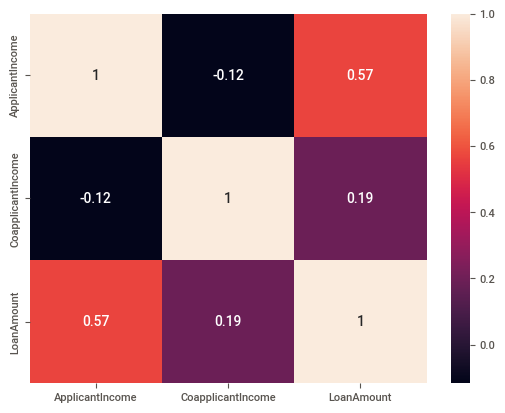

In [154]:
# co relation 
df = new_data[['ApplicantIncome','CoapplicantIncome','LoanAmount']]
sns.heatmap(df.corr(),annot=True)

### Model Building

In [156]:
new_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Married_Yes
0,0.070489,0.000000,0.172214,360.0,1.0,Y,1,0,0,0,0,0,0,1,0
1,0.054830,0.036192,0.172214,360.0,1.0,N,1,1,0,0,0,0,0,0,1
2,0.035250,0.000000,0.082489,360.0,1.0,Y,1,0,0,0,0,1,0,1,1
3,0.030093,0.056592,0.160637,360.0,1.0,Y,1,0,0,0,1,0,0,1,1
4,0.072356,0.000000,0.191027,360.0,1.0,Y,1,0,0,0,0,0,0,1,0


In [157]:
# encode the target variable
# Y = 1
# N = 0

new_data['Loan_Status'] = new_data['Loan_Status'].map({'Y':1,'N':0})

In [158]:
# split the data into x and y
x = new_data.drop(columns= 'Loan_Status',axis=1)
y = new_data['Loan_Status']

In [159]:
# split the data into training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.30, random_state = 42)

In [160]:
# check wether a data is balanced or not
new_data['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [161]:
#  we see our data is not balanced
# we will balance the data using a technique called SMOTE
# SMOTE - SYNTHETIC minority ovesampling technique

In [162]:
!pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.12.4-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.12.4-py3-none-any.whl (258 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.3
    Uninstalling imbalanced-learn-0.12.3:
      Successfully uninstalled imbalanced-learn-0.12.3


In [163]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [164]:
x_smote, y_smote = smote.fit_resample(x_train,y_train)

Counter is a container whihc keeps the track of how many equivalent values are added

In [166]:
from collections import Counter
Counter(y_train)

Counter({1: 302, 0: 127})

In [167]:
Counter(y_smote)

Counter({0: 302, 1: 302})

In [168]:
# Algorithm
from sklearn.svm import SVC

model = SVC()

model.fit(x_smote, y_smote)

SVC()

In [169]:
y_pred = model.predict(x_test)

In [170]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,y_pred)

0.6432432432432432

In [171]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.40      0.03      0.06        65
           1       0.65      0.97      0.78       120

    accuracy                           0.64       185
   macro avg       0.53      0.50      0.42       185
weighted avg       0.56      0.64      0.53       185



### Cross Validation

In [173]:
from sklearn.model_selection import cross_val_score

cross_val = cross_val_score(model,x,y,cv=10,scoring = 'accuracy')

In [174]:
cross_val

array([0.69354839, 0.69354839, 0.67741935, 0.67741935, 0.68852459,
       0.68852459, 0.68852459, 0.68852459, 0.68852459, 0.68852459])

In [175]:
print('Cross validation score',cross_val.std())
#if std() is less than 0.05 then we say the model is working good

Cross validation score 0.005313530063281029


### Hyper parameter tuning technique

In [177]:
#define the parameters
param_grid = {'C':[1,5,10,50,60,70],
              'gamma':[0.1,0.01,0.001,0.02,0.032,0.001],
              'random_state':list(range(1,20))}

In [178]:
from sklearn.model_selection import GridSearchCV

svc = SVC()

grid = GridSearchCV(svc,param_grid,cv=5,scoring='accuracy',verbose=2)

grid.fit(x,y)

Fitting 5 folds for each of 684 candidates, totalling 3420 fits
[CV] END .....................C=1, gamma=0.1, random_state=1; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=1; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=1; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=1; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=1; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END .....................C=1, gamma=0.1,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 50, 60, 70],
                         'gamma': [0.1, 0.01, 0.001, 0.02, 0.032, 0.001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy', verbose=2)

In [179]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.032, 'random_state': 1}


In [180]:
model1 = SVC(C=10,gamma=0.032,random_state=1)
model1.fit(x_smote,y_smote)

SVC(C=10, gamma=0.032, random_state=1)

In [181]:
y_pred1 = model1.predict(x_test)

In [182]:
accuracy_score(y_test,y_pred1)

0.6810810810810811